# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  [banknote_authentication.csv](./data/banknote_authentication.csv) can be found in the `data`  directory.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8)

Please insert you  firstname  and name below

In [5]:
# Aleksandra Stępień
# Jakub Chmura

In [6]:
from  sklearn.model_selection import train_test_split
seed = 31287

In [7]:
data = pd.read_csv('data/banknotes_data.csv')

In [8]:
data.head()

,a0,a1,a2,a3,counterfeit
0,-1.1306,1.8458,-1.35750,-1.38060,1
1,-1.1188,3.3357,-1.34550,-1.95730,1
2,2.6719,3.0646,0.37158,0.58619,0
3,-4.1409,3.4619,-0.47841,-3.88790,1
4,1.4507,8.7903,-2.23240,-0.65259,0


In [9]:
data.describe()

,a0,a1,a2,a3,counterfeit
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.431116,1.902054,1.426607,-1.220393,0.444254
std,2.845672,5.942260,4.397341,2.101777,0.497096
min,-7.042100,-13.773100,-5.286100,-7.871900,0.000000
25%,-1.770900,-1.916200,-1.664300,-2.466150,0.000000
50%,0.471345,2.408650,0.567365,-0.614450,0.000000
75%,2.816925,6.800675,3.338825,0.394810,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a0           1166 non-null   float64
 1   a1           1166 non-null   float64
 2   a2           1166 non-null   float64
 3   a3           1166 non-null   float64
 4   counterfeit  1166 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 45.7 KB


In [11]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data.loc[:,'counterfeit'], random_state=seed)

In [12]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


In [13]:
lbls_train = data_train['counterfeit']
lbls_test = data_test['counterfeit']

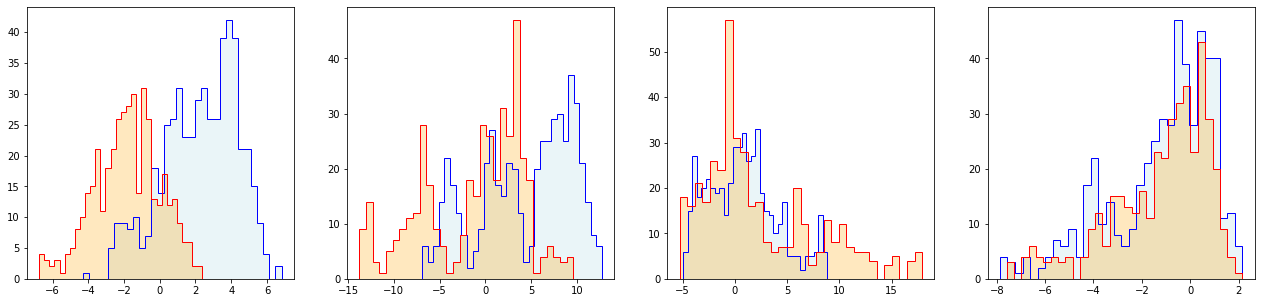

In [14]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
for i in range(4):
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='step', color='blue')
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='step', color='red')
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='bar', color='lightblue', alpha=0.25)
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='bar', color='orange', alpha =0.25)

# Problem 1

Train a neural network classifier to predict counterfeit banknotes. Use the features `a0` and `a3`. Calculate the confussion matrix  and AUC score. 

In [15]:
import torch
import torch.nn as tnn

In [16]:
features= [0, 3]
nf=len(features)

In [17]:
features_train = torch.from_numpy(data_train.values[:,features]).to(dtype=torch.float32)
labels_train = torch.from_numpy(data_train.values[:,4:5]).to(dtype=torch.float32)

In [18]:
features_test = torch.from_numpy(data_test.values[:,features]).to(dtype=torch.float32)
labels_test = torch.from_numpy(data_test.values[:,4:5]).to(dtype=torch.float32)

In [19]:
model = tnn.Sequential(tnn.Linear(in_features=nf, out_features=1), tnn.Sigmoid())

In [26]:
# Training the model

In [20]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [21]:
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 2500
for epoch in range(epochs):
    model.train()
    y_pred = model(features_train)
    loss = loss_fn(y_pred, labels_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.3f}")

Epoch 0, Loss: 0.740
Epoch 100, Loss: 0.606
Epoch 200, Loss: 0.518
Epoch 300, Loss: 0.462
Epoch 400, Loss: 0.425
Epoch 500, Loss: 0.401
Epoch 600, Loss: 0.383
Epoch 700, Loss: 0.370
Epoch 800, Loss: 0.361
Epoch 900, Loss: 0.353
Epoch 1000, Loss: 0.347
Epoch 1100, Loss: 0.343
Epoch 1200, Loss: 0.339
Epoch 1300, Loss: 0.336
Epoch 1400, Loss: 0.334
Epoch 1500, Loss: 0.332
Epoch 1600, Loss: 0.330
Epoch 1700, Loss: 0.329
Epoch 1800, Loss: 0.328
Epoch 1900, Loss: 0.327
Epoch 2000, Loss: 0.327
Epoch 2100, Loss: 0.326
Epoch 2200, Loss: 0.326
Epoch 2300, Loss: 0.325
Epoch 2400, Loss: 0.325


In [22]:
y_true = labels_test.numpy()
with torch.no_grad():
  y_proba = model(features_test);
  y_predicted = 1*(y_proba>0.5)

In [23]:
accuracy_score(y_true, y_pred=y_predicted)

0.8803418803418803

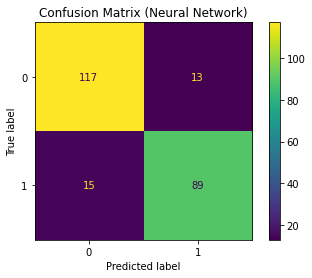

In [24]:
y_proba_np = y_proba.numpy()

cm = confusion_matrix(y_true, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Neural Network)")
plt.show()

In [25]:
auc = roc_auc_score(y_true, y_proba_np)
print(f"AUC score: {auc:.2f}")

AUC score: 0.95
